<a href="https://colab.research.google.com/github/RohitPatilRRP/Crime_rate/blob/master/Crime_Prediction_new_chicago.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#import tensorflow
from keras.layers.core import Dense, Activation, Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Input, Dense, GRU, Embedding
from tensorflow.python.keras.optimizers import RMSprop
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau

In [0]:
#import packages
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler

In [7]:
from google.colab import files
uploaded = files.upload()

Saving data_encoded_10k.csv to data_encoded_10k (1).csv


In [8]:
import io
df = pd.read_csv(io.BytesIO(uploaded['data_encoded_10k.csv']))
df.head()

,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,GAMBLING,...,VIOLATION OF CIVIL NO CONTACT ORDER,VIOLATION OF SMOKING BAN,VIOLATION OF STALKING NO CONTACT ORDER,VIOLENT OFFENDER: ANNUAL REGISTRATION,VIOLENT OFFENDER: DUTY TO REGISTER,VIOLENT OFFENDER: FAIL TO REGISTER NEW ADDRESS,Arrest,Domestic,Latitude,Longitude
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,41.934649,-87.680641
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,41.886013,-87.629505
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,41.970922,-87.735511
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,41.896151,-87.765442
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,41.895958,-87.770300


In [0]:
target_crime= ['ASSAULT'] 
target_names = ['Latitude','Longitude']
shift_steps = 1*60

In [0]:
df_targets = df[target_names].shift(-shift_steps)

In [11]:
df[target_names].head(shift_steps + 5)

,Latitude,Longitude
0,41.934649,-87.680641
1,41.886013,-87.629505
2,41.970922,-87.735511
3,41.896151,-87.765442
4,41.895958,-87.770300
5,41.921021,-87.697304
6,41.874128,-87.743533
7,41.945859,-87.823624
8,41.861718,-87.721386
9,41.883131,-87.677673


In [12]:
df_targets.head(5)

,Latitude,Longitude
0,41.876245,-87.655323
1,41.889582,-87.626649
2,41.903933,-87.629129
3,41.939727,-87.776263
4,41.744483,-87.564417


In [13]:
df_targets.tail()

,Latitude,Longitude
9994,NaN,NaN
9995,NaN,NaN
9996,NaN,NaN
9997,NaN,NaN
9998,NaN,NaN


In [0]:
x_data = df.values[0:-shift_steps]

In [15]:
print(type(x_data))
print("Shape:", x_data.shape)

<class 'numpy.ndarray'>
Shape: (9939, 340)


In [0]:
y_data = df_targets.values[:-shift_steps]

In [17]:
num_data = len(x_data)
num_data

9939

In [0]:
train_split = 0.9

In [19]:
num_train = int(train_split * num_data)
num_train

8945

In [20]:
num_test = num_data - num_train
num_test

994

In [21]:
x_train = x_data[0:num_train]
x_test = x_data[num_train:]
len(x_train) + len(x_test)

9939

In [22]:
y_train = y_data[0:num_train]
y_test = y_data[num_train:]
len(y_train) + len(y_test)

9939

In [23]:
num_x_signals = x_data.shape[1]
num_x_signals

340

In [24]:
num_y_signals = y_data.shape[1]
num_y_signals

2

In [25]:
print("Min:", np.min(x_train))
print("Max:", np.max(x_train))

Min: -87.91510545
Max: 42.02253435


In [0]:
x_scaler = MinMaxScaler()

In [0]:
x_train_scaled = x_scaler.fit_transform(x_train)

In [28]:
print("Min:", np.min(x_train_scaled))
print("Max:", np.max(x_train_scaled))

Min: 0.0
Max: 1.0


In [0]:
x_test_scaled = x_scaler.transform(x_test)

In [0]:
y_scaler = MinMaxScaler()
y_train_scaled = y_scaler.fit_transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [31]:
print(x_train_scaled.shape)
print(y_train_scaled.shape)

(8945, 340)
(8945, 2)


In [0]:
def batch_generator(batch_size, sequence_length):
    while True:
        x_shape = (batch_size, sequence_length, num_x_signals)
        x_batch = np.zeros(shape=x_shape, dtype=np.float16)
        y_shape = (batch_size, sequence_length, num_y_signals)
        y_batch = np.zeros(shape=y_shape, dtype=np.float16)
        for i in range(batch_size):
            idx = np.random.randint(num_train - sequence_length)
            x_batch[i] = x_train_scaled[idx:idx+sequence_length]
            y_batch[i] = y_train_scaled[idx:idx+sequence_length]
        
        yield (x_batch, y_batch)

In [0]:
batch_size =64

In [34]:
sequence_length = 1*60*24 #next day
sequence_length

1440

In [0]:
generator = batch_generator(batch_size=batch_size,
                            sequence_length=sequence_length)

In [0]:
x_batch, y_batch = next(generator)

In [37]:
print(x_batch.shape)
print(y_batch.shape)

(64, 1440, 340)
(64, 1440, 2)


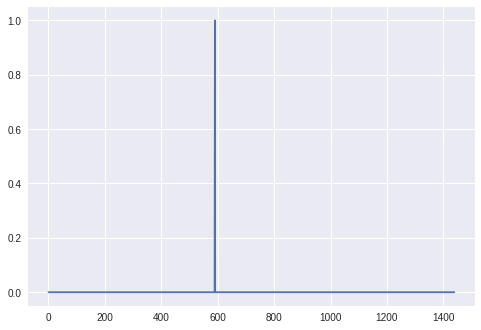

In [38]:
batch = 0   # First sequence in the batch.
signal = 0  # First signal from the 10 input-signals.
seq = x_batch[batch, :, signal]
plt.plot(seq)

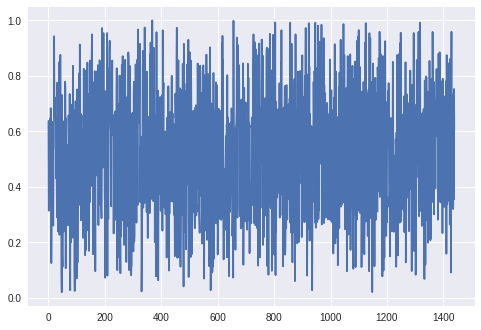

In [39]:
seq = y_batch[batch, :, signal]
plt.plot(seq)

In [0]:
validation_data = (np.expand_dims(x_test_scaled, axis=0),
                   np.expand_dims(y_test_scaled, axis=0))

In [0]:
model = Sequential()
model.add(GRU(units=512,
              return_sequences=True, dropout=0.2,
              input_shape=(None, num_x_signals,)))
model.add(Dense(num_y_signals, activation='sigmoid'))
if False:
    from tensorflow.python.keras.initializers import RandomUniform
    init = RandomUniform(minval=-0.05, maxval=0.05)

    model.add(Dense(num_y_signals,
                    activation='linear',
                    kernel_initializer=init))
warmup_steps = 50

In [0]:
def loss_mse_warmup(y_true, y_pred):
    y_true_slice = y_true[:, warmup_steps:, :]
    y_pred_slice = y_pred[:, warmup_steps:, :]
    loss = tf.losses.mean_squared_error(labels=y_true_slice,
                                        predictions=y_pred_slice)
    loss_mean = tf.reduce_mean(loss)

    return loss_mean

In [72]:
optimizer = RMSprop(lr=1e-3)
model.compile(loss=loss_mse_warmup, optimizer=optimizer)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_5 (GRU)                  (None, None, 512)         1310208   
_________________________________________________________________
dense_2 (Dense)              (None, None, 2)           1026      
Total params: 1,311,234
Trainable params: 1,311,234
Non-trainable params: 0
_________________________________________________________________


In [0]:
path_checkpoint = '23_checkpoint.keras'
callback_checkpoint = ModelCheckpoint(filepath=path_checkpoint,
                                      monitor='val_loss',
                                      verbose=1,
                                      save_weights_only=True,
                                      save_best_only=True)
callback_early_stopping = EarlyStopping(monitor='val_loss',
                                        patience=5, verbose=1)
callback_tensorboard = TensorBoard(log_dir='./23_logs/',
                                   histogram_freq=0,
                                   write_graph=False)
callback_reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                                       factor=0.1,
                                       min_lr=1e-3,
                                       patience=0,
                                       verbose=1)

In [0]:
callbacks = [callback_early_stopping,
             callback_checkpoint,
             callback_tensorboard,
             callback_reduce_lr]

In [77]:
%%time
model.fit_generator(generator=generator,
                    epochs=6,
                    steps_per_epoch=100,
                    validation_data=validation_data,
                    callbacks=callbacks)

Epoch 1/6
1/1 [==============================] - 1s 503ms/sample - loss: 0.0429

Epoch 00001: val_loss improved from inf to 0.04286, saving model to 23_checkpoint.keras
100/100 [==============================] - 351s 4s/step - loss: 0.0320 - val_loss: 0.0429
Epoch 2/6
1/1 [==============================] - 0s 379ms/sample - loss: 0.0462

Epoch 00002: val_loss did not improve from 0.04286

Epoch 00002: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
100/100 [==============================] - 350s 3s/step - loss: 0.0254 - val_loss: 0.0462
Epoch 3/6
1/1 [==============================] - 0s 380ms/sample - loss: 0.0477

Epoch 00003: val_loss did not improve from 0.04286

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0001.
100/100 [==============================] - 349s 3s/step - loss: 0.0190 - val_loss: 0.0477
Epoch 4/6
1/1 [==============================] - 0s 379ms/sample - loss: 0.0483

Epoch 00004: val_loss did not improve from 0.04286
100/100 [========

In [0]:
try:
    model.load_weights(path_checkpoint)
except Exception as error:
    print("Error trying to load checkpoint.")
    print(error)

In [65]:
result = model.evaluate(x=np.expand_dims(x_test_scaled, axis=0),
                        y=np.expand_dims(y_test_scaled, axis=0))

1/1 [==============================] - 0s 384ms/sample - loss: 0.0395


In [66]:
print("loss (test-set):", result)

loss (test-set): 0.039466362446546555


In [0]:
if False:
    for res, metric in zip(result, model.metrics_names):
        print("{0}: {1:.3e}".format(metric, res))

In [0]:
def plot_comparison(start_idx, length=100, train=True):
    """
    Plot the predicted and true output-signals.
    
    :param start_idx: Start-index for the time-series.
    :param length: Sequence-length to process and plot.
    :param train: Boolean whether to use training- or test-set.
    """
    
    if train:
        # Use training-data.
        x = x_train_scaled
        y_true = y_train
    else:
        # Use test-data.
        x = x_test_scaled
        y_true = y_test
    
    # End-index for the sequences.
    end_idx = start_idx + length
    
    # Select the sequences from the given start-index and
    # of the given length.
    x = x[start_idx:end_idx]
    y_true = y_true[start_idx:end_idx]
    
    # Input-signals for the model.
    x = np.expand_dims(x, axis=0)

    # Use the model to predict the output-signals.
    y_pred = model.predict(x)
    
    # The output of the model is between 0 and 1.
    # Do an inverse map to get it back to the scale
    # of the original data-set.
    y_pred_rescaled = y_scaler.inverse_transform(y_pred[0])
    
    # For each output-signal.
    for signal in range(len(target_names)):
        # Get the output-signal predicted by the model.
        signal_pred = y_pred_rescaled[:, signal]
        
        # Get the true output-signal from the data-set.
        signal_true = y_true[:, signal]

        # Make the plotting-canvas bigger.
        plt.figure(figsize=(15,5))
        
        # Plot and compare the two signals.
        plt.plot(signal_true, label='true')
        plt.plot(signal_pred, label='pred')
        
        # Plot grey box for warmup-period.
        p = plt.axvspan(0, warmup_steps, facecolor='black', alpha=0.15)
        
        # Plot labels etc.
        plt.ylabel(target_names[signal])
        plt.legend()
        plt.show()

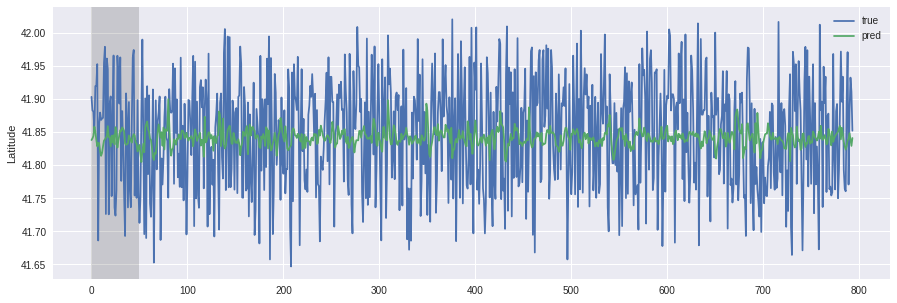

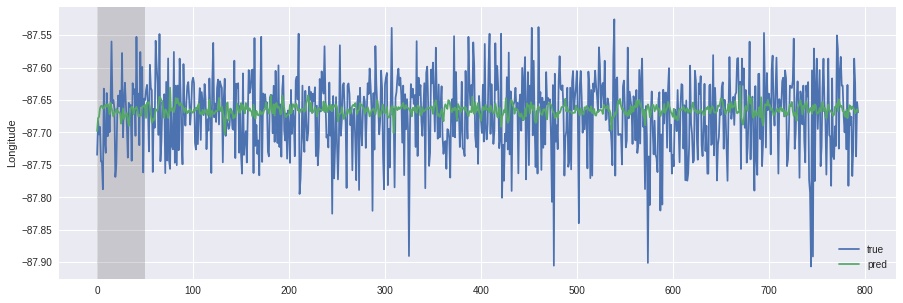

In [69]:
plot_comparison(start_idx=200, length=1000, train=False)

In [0]:
model.save(r'C:\Users\rohit\Desktop\BE_PROJECT\model_new.h5')

In [79]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}


E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 113597 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.1-0ubuntu3~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=ht

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [81]:
!ls drive

 0AND1.ASM
 1.psd
 2016-12-14-14-19-26_1481705966097.jpg
 20170403_163753.jpg
 2.psd
 3.psd
 4mixed.tcl
 4.psd
 5.psd
 ADD.ASM
 AEM.rar
'All access Form.zip'
'Android Projects'
'ankur gupta gate notes'
 app.rar
'attachment(31).pdf'
'Badminton Final-1 - Copy.odt'
'Badminton Final-1.odt'
 BCD2BIN.ASM
'BCE GD'
 Book1.xlsx
 Book1.xlsx.ods
'Book1.xlsx.ods (64e00cce)'
'Book1.xlsx.ods (75e44d8c)'
'Book1.xlsx.ods (8fccfbc9)'
'Book1.xlsx.ods (cc7ca49b)'
'Book1.xlsx.ods (cf38f848)'
'Bookswap_final (f6957273).rar'
 Bookswap_final.rar
 bookswap.rar
 Certificates
'chemistry - Bar chart 1.ods'
 chemistry.odt
'chicago_crime_2016 (b065cc75).csv'
 chicago_crime_2016.csv
'CN easy solution.pdf'
'CN Toppers Solution'
'Colab Notebooks'
'connect (07f9828f).php'
 connect.php
'Contact Information.zip'
'Copy of Prototyping presentation.pdf'
'Copy of TECHMATE 2K17 {2} (Responses).ods'
'Copy of TECHMATE 2K17 {2}.zip'
'Copy of TECHMATE 2K17 (Responses).ods'
'Copy of TECHMATE 2K17.zip'
'Copy of Untitled form.zip'


In [85]:
model_json = model.to_json()
with open("drive/app/model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("drive/app/model_weights.h5")
print("Saved model to drive")

Saved model to drive


In [0]:
model.save('weights.h5')
files.download('weights.h5')

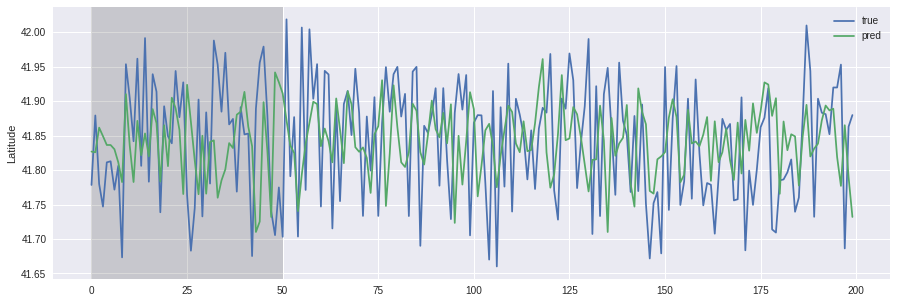

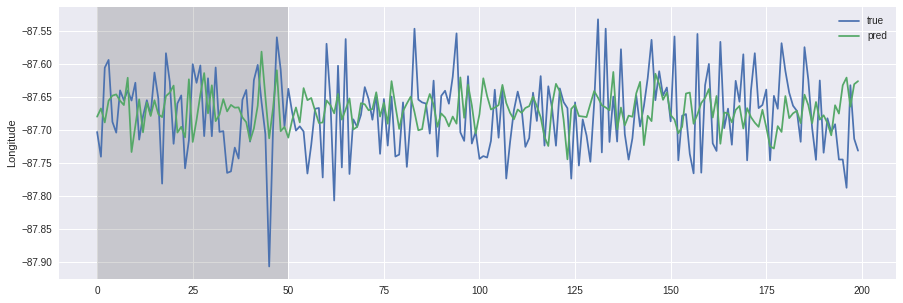

In [96]:
plot_comparison(start_idx=10, length=200, train=False)